In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('dataset.csv')

# # Create a DataFrame from the given data
# data = {
#     'num1': ['two', 'five', 'tree', 'nine', 'seven'],
#     'num2': ['one', 'for', 'two', 'ten', 'eight'],
#     'num3': ['1', '4', '2', '8', '6'],
#     'num4': ['0', '3', '1', '9', '7']
# }
data['QUANTITY'].fillna(1, inplace=True)  # Fill missing values with 0


df = pd.DataFrame(data)


# Define the categorical and numerical columns
categorical_cols = ['ID','TRANSACTION','BRAND','ITEM','PRICE','DATE']
numerical_cols = ['QUANTITY']

/home/francis/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto

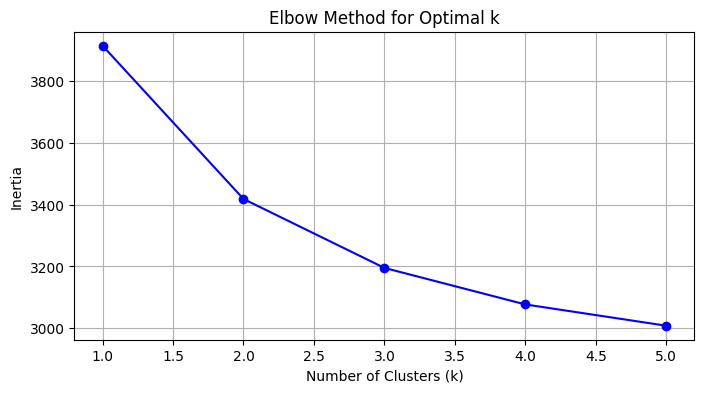

/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


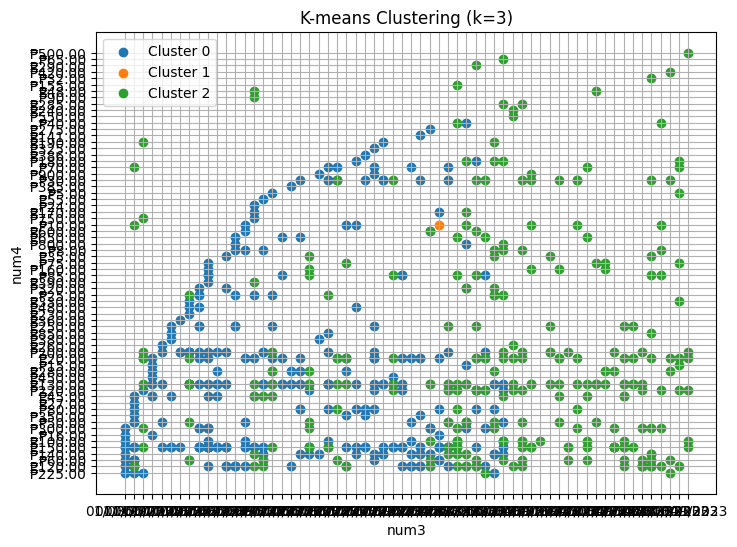

In [10]:
# Create transformers for one-hot encoding and standardization
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(sparse=False)),
])

numerical_transformer = Pipeline([
    ('scaler', StandardScaler()),
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols),
    ])

# Perform data preprocessing
df_processed = preprocessor.fit_transform(df)

# Determine the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow method, select the optimal value of k (e.g., k=3 in this case)
optimal_k = 3

# Perform K-means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_processed)

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for cluster_num in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['DATE'], cluster_data['PRICE'], label=f'Cluster {cluster_num}')

plt.xlabel('num3')
plt.ylabel('num4')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()
